MLR Implement 

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import math

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('/content/Advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [4]:
corr=df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Unnamed: 0,TV,Radio,Newspaper,Sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
Radio,-0.110680,0.054809,1.000000,0.354104,0.576223
Newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
Sales,-0.051616,0.782224,0.576223,0.228299,1.000000


In [5]:
endog = df['Sales']
exog = sm.add_constant(df[['TV','Radio','Newspaper']])
print(exog)

     const     TV  Radio  Newspaper
0      1.0  230.1   37.8       69.2
1      1.0   44.5   39.3       45.1
2      1.0   17.2   45.9       69.3
3      1.0  151.5   41.3       58.5
4      1.0  180.8   10.8       58.4
..     ...    ...    ...        ...
195    1.0   38.2    3.7       13.8
196    1.0   94.2    4.9        8.1
197    1.0  177.0    9.3        6.4
198    1.0  283.6   42.0       66.2
199    1.0  232.1    8.6        8.7

[200 rows x 4 columns]


In [6]:
X=exog.to_numpy()
Y= endog.to_numpy()
s1_xt =np.transpose(X)
print(s1_xt)

[[  1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
    1.    1.    1.    1.    1.    1.    1.    1.   

In [7]:
s2_mul1= np.matmul(s1_xt,X)
print(s2_mul1)

[[2.00000000e+02 2.94085000e+04 4.65280000e+03 6.11080000e+03]
 [2.94085000e+04 5.79111839e+06 6.98061980e+05 9.19625280e+05]
 [4.65280000e+03 6.98061980e+05 1.52107860e+05 1.64946550e+05]
 [6.11080000e+03 9.19625280e+05 1.64946550e+05 2.81096740e+05]]


In [8]:
s3_inv=np.linalg.inv(s2_mul1)
print(s3_inv)

[[ 3.42444998e-02 -9.35348333e-05 -3.92647297e-04 -2.08036831e-04]
 [-9.35348333e-05  6.84890750e-07 -1.57355890e-07 -1.14959987e-07]
 [-3.92647297e-04 -1.57355890e-07  2.61016474e-05 -6.26574016e-06]
 [-2.08036831e-04 -1.14959987e-07 -6.26574016e-06  1.21328472e-05]]


In [9]:
s4_mul= np.matmul(s3_inv,s1_xt)
print(s4_mul)

[[-1.65160819e-02  5.26869984e-03  1.96237324e-04 -8.31251544e-03
   9.43460192e-04 -1.37246842e-03  1.10985500e-02  1.28924985e-02
   3.24075040e-02  1.01249763e-02  2.07500017e-02  3.90688861e-03
   4.52682346e-03  2.06428689e-02 -7.33374999e-03 -1.37666311e-02
  -1.01842517e-02 -1.92334904e-02  1.59155457e-02  7.10904496e-03
  -8.16900471e-03  5.14796362e-03  1.64481211e-02  8.04193048e-04
   1.96628497e-02  4.22320837e-03  6.75254222e-03  4.65533016e-04
  -4.43175192e-03  1.28706811e-02 -1.32509625e-02  8.82213246e-03
   1.83228381e-02  1.48629106e-03  2.32040375e-02  3.67575676e-03
  -8.95808300e-03 -1.64661192e-03  1.24273729e-02 -8.54142390e-03
  -2.63025454e-05 -3.47661079e-03 -4.46812371e-03  6.10173314e-03
   1.27977451e-02  2.47882611e-03  1.45403021e-02 -8.33805093e-03
  -3.59147950e-03  1.57372907e-02  7.14095912e-03  2.03352559e-02
  -1.06080889e-02 -1.31870279e-02 -4.94312870e-03 -1.62385649e-02
   1.39155816e-02  1.05128160e-02 -1.27909375e-02  1.01887261e-03
   2.40031

In [10]:
s5_res =np.matmul(s4_mul,Y)
print(s5_res)

[ 2.93888937e+00  4.57646455e-02  1.88530017e-01 -1.03749304e-03]


In [11]:
mod = sm.OLS(endog, exog)
results = mod.fit()
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 19 Dec 2021   Prob (F-statistic):           1.58e-96
Time:                        18:04:03   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

In [12]:
def RSE(y_true, y_predicted):
   
    y_true = np.array(y_true)
    y_predicted = np.array(y_predicted)
    RSS = np.sum(np.square(y_true - y_predicted))

    rse = math.sqrt(RSS / (len(y_true) - 2))
    return rse

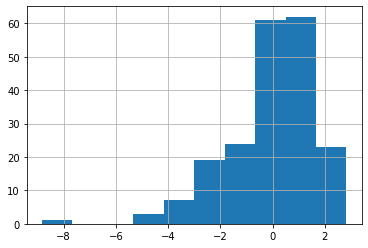

In [13]:
yp= results.predict()
ypa = np.array(yp)
yta = df['Sales']
eterms =yta-ypa


df1 = pd.DataFrame(eterms)
df1['Sales'].hist(bins=10)






In [14]:
rse= RSE(df['Sales'],results.predict())
print(rse)

1.6769760888385674


In [15]:
from sklearn import linear_model
X = df[['TV','Radio','Newspaper']]
y = df['Sales']

lm = linear_model.LinearRegression()
model = lm.fit(X,y)
lm.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [16]:
lm.intercept_

2.938889369459412